from google.colab import drive
drive.mount('/content/drive')

### Sales Prediction using Regression Models
#### Problem Statement:
As the success of the retail store depends upon its sales.More the sales made more is the revenue.

The supermarket has several outlets we need to to predict the sales which they can expect.

Application of predicting the sales:
We can tell the company what are all the challenges they may face.

What are the brands or products which is sold the most.

This helps sales team to understand which product to sell & which product to promote.

## Data Description
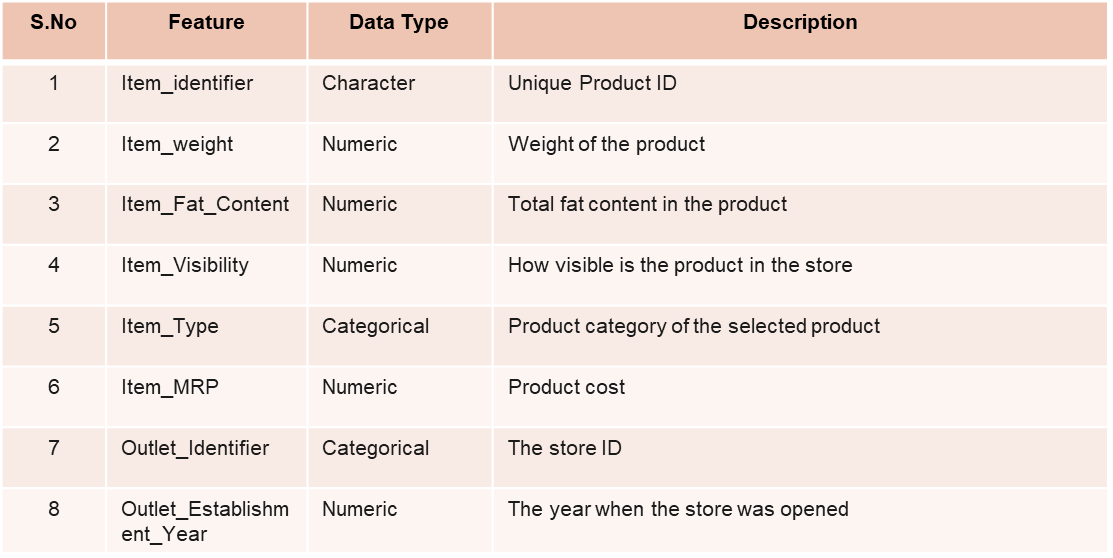
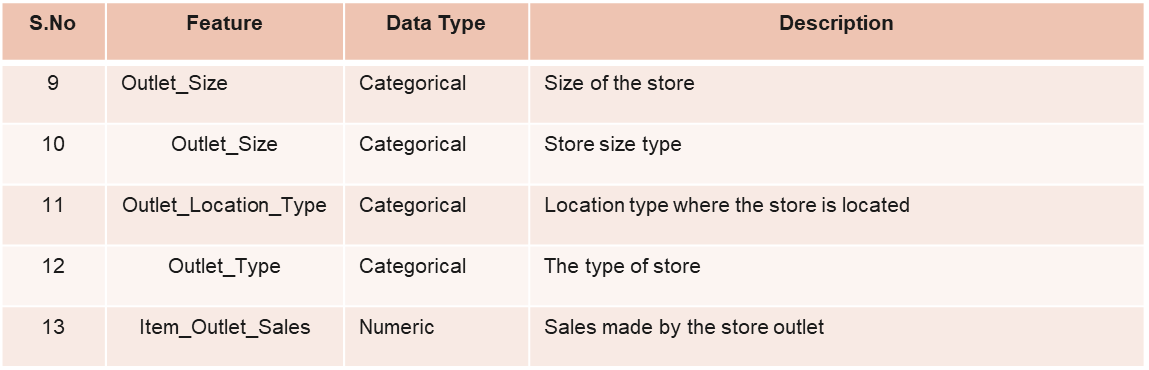

In [ ]:
#IMPORTING REQUIRED

#libraries for the arrays and dataframe
import numpy as np
import pandas as pd
from numpy import mean
from math import sqrt

#library for splitting the data into train and test
from sklearn.model_selection import train_test_split

#metric libraries from sklearn for calculation of the error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#library required for the label encoder
from sklearn import preprocessing

#library required for scalling the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#to remove warnings
import warnings
warnings.simplefilter(action='ignore')

#library for visualization the graphs
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#READING THE DATASET
store_df_main=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/DATA/DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
store_df_main

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [ ]:
#CHECKING FOR THE NULL VALUES IN DATASET
store_df_main.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

AS WE CAN SEE THAT THERE ARE NULL VALUES PRESENT IN THE SALES FEATURE, WHICH ARE AROUND MORE THAN 30% OF OUR DATA. SO WE'RE FILLING THE NULL VALUES FROM THE DATA BY MEAN.

In [ ]:
#FILLING THE NULL VALUES WITH MEAN
store_df_main['Item_Outlet_Sales'].fillna(int(store_df_main['Item_Outlet_Sales'].mean()), inplace=True)
print(store_df_main.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
#CREATING THE COPY OF THE DATASET
store_df=store_df_main.copy()
store_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
#CHECKING FOR ANY SPECIAL CHARACTERS IN THE DATA, AND REPLACING THEM WITH NAN VALUES
store_df = store_df.replace(to_replace = "@!#$%^&*()<>?/|}{~:?", value = np.nan)

In [ ]:
#ENCODING THE CATEGORICAL DATA INTO NUMERICAL DATA
label_encoder = preprocessing.LabelEncoder()

lst_1 = ["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for i in lst_1:
  store_df[i] = label_encoder.fit_transform(store_df[i])
store_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
#CHECKING THE DATA TYPES
store_df.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#RECHECKING THE SHAPE OF THE NEW DATASET
store_df.shape

(14204, 12)

In [ ]:
#CHECKING FOR THE CORRELATION BETWEEN FEATURES
corr=store_df.corr()
corr.style.background_gradient(cmap='Oranges')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002220
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.010262
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.014494
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.105063
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.013194
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.440979
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.125742
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.038061
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.046879
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.069224


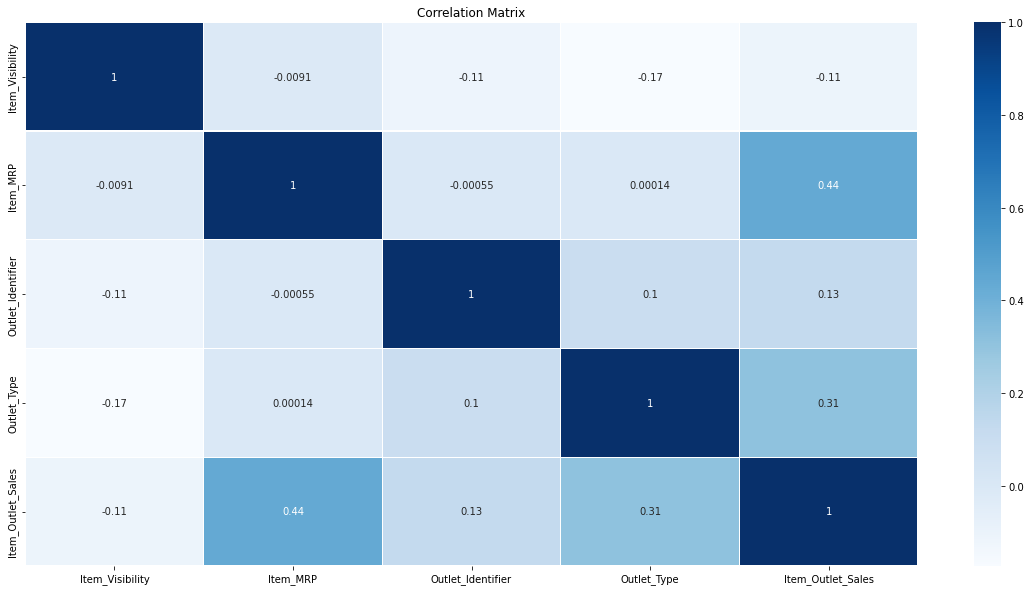

In [ ]:
#SELECTING BEST FEATURE BASED ON THERE CORRELATION VALUE GREATER THAN 0.1
sel_corr = []
for i in store_df:
  if abs(store_df[i].corr(store_df['Item_Outlet_Sales']))>=0.1:
    sel_corr.append(i) 

#PLOTTING HEATMAP AMONG SELECTED FEATURES

fig, ax = plt.subplots(figsize = (20,10))
ax = (sns.heatmap(store_df[sel_corr]
                  .corr(), annot =True, cmap ='Blues',linewidths=0.1, linecolor='white').set(title = 'Correlation Matrix'))
plt.show()

 **MODEL BUILDING ON HIGHLY CORRELATED FEATURES WITH OUR TARGET FEATURE.**

In [ ]:
#STORING HIGHLY CORRELATED FEATURES INTO NEW VARIABLE AS A DATAFRAME
corr_store_df=store_df[sel_corr]
corr_store_df

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,0.016047,249.8092,9,1,3735.1380
1,0.019278,48.2692,3,2,443.4228
2,0.016760,141.6180,9,1,2097.2700
3,0.074402,182.0950,0,0,732.3800
4,0.064299,53.8614,1,1,994.7052
...,...,...,...,...,...
14199,0.013496,141.3154,8,1,2181.0000
14200,0.142991,169.1448,3,2,2181.0000
14201,0.073529,118.7440,7,1,2181.0000
14202,0.064709,214.6218,2,1,2181.0000


VISUALIZATION OF THE CATEGORICAL COLUMNS WITH THE SALES COLUMNS

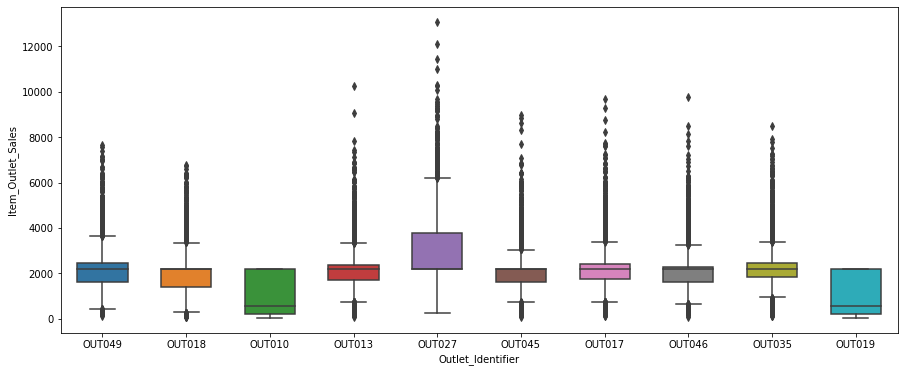

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=store_df_main,width=0.6)

INTERPRETATION-
HERE WE CAN SEE THAT THE SALES OF OUTLET-027 HAS RECORDED HIGHEST SALES.

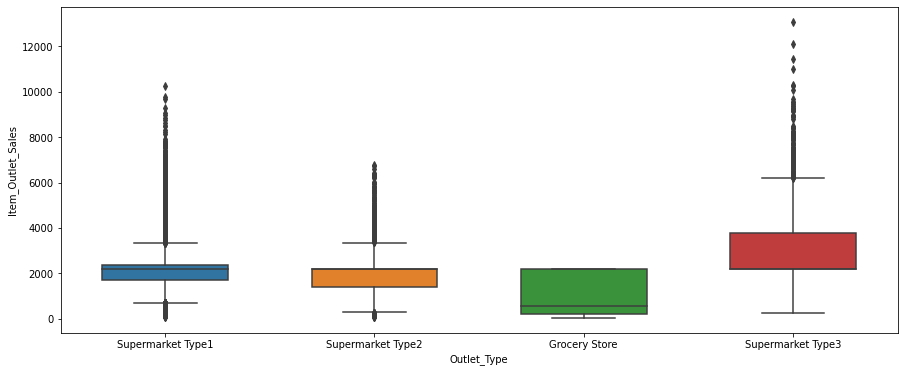

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=store_df_main,width=0.6)

INTERPRETAION-
SUPERMARKET TYPE-3 HAS RECORDED HISGHET SALES COMPARED TO ALL.

VISUALIZATION OF THE NUMERICAL COLUMNS WITH THE SALES COLUMN

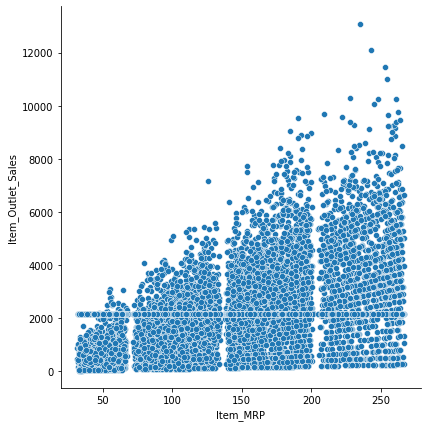

In [ ]:
sns.pairplot(corr_store_df,x_vars='Item_MRP', y_vars='Item_Outlet_Sales',height=6)

INTERPRETATION-

CONSIDERING THE PAIR PLOT OF SALES VS MRP, WE CAN SEE THAT THE MRP RANGING FROM 150-250 HAS HIGH SALES.

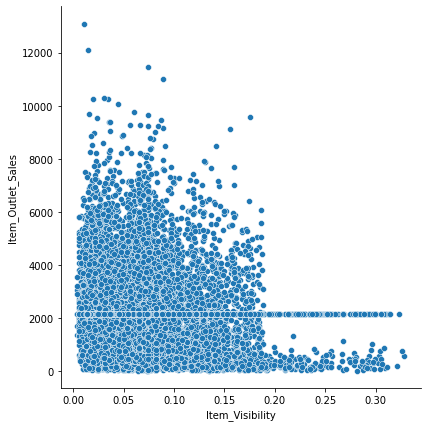

In [ ]:
sns.pairplot(corr_store_df,x_vars='Item_Visibility', y_vars='Item_Outlet_Sales',height=6)

INTERPRETATION-

HERE, WE CAN SEE THAT THE ITEM VISIBLE FROM 0 - 0.15 HAVE HIGH SALES.

In [ ]:
# DEFINING METHOD TO PERFORM DATA SCALING OPERATION BASED ON THE TYPE OF SCALING
def feature_scale(scale):                                                       
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  corr_store_sc = pd.DataFrame(scaler.fit_transform(corr_store_df.to_numpy()),columns=corr_store_df.columns)
  return corr_store_sc

In [ ]:

# SCALING THE DATA USING MINMAX SCALING PROCESS
scale = 'minmax'        #standard                     
corr_store_sc_df = feature_scale(scale)
corr_store_sc_df

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,0.038399,0.927507,1.000000,0.333333,0.283587
1,0.048346,0.072068,0.333333,0.666667,0.031419
2,0.040593,0.468288,1.000000,0.333333,0.158115
3,0.218055,0.640093,0.000000,0.000000,0.053555
4,0.186950,0.095805,0.111111,0.333333,0.073651
...,...,...,...,...,...
14199,0.030546,0.467004,0.888889,0.333333,0.164529
14200,0.429216,0.585126,0.333333,0.666667,0.164529
14201,0.215364,0.371199,0.777778,0.333333,0.164529
14202,0.188211,0.778154,0.222222,0.333333,0.164529


In [ ]:
#corr_store_df
a=corr_store_sc_df.iloc[:,:4]
b=corr_store_df.iloc[:,[4]]
corr_store_sc_df2 = pd.concat([a, b], axis=1)
corr_store_sc_df2




,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,0.038399,0.927507,1.000000,0.333333,3735.1380
1,0.048346,0.072068,0.333333,0.666667,443.4228
2,0.040593,0.468288,1.000000,0.333333,2097.2700
3,0.218055,0.640093,0.000000,0.000000,732.3800
4,0.186950,0.095805,0.111111,0.333333,994.7052
...,...,...,...,...,...
14199,0.030546,0.467004,0.888889,0.333333,2181.0000
14200,0.429216,0.585126,0.333333,0.666667,2181.0000
14201,0.215364,0.371199,0.777778,0.333333,2181.0000
14202,0.188211,0.778154,0.222222,0.333333,2181.0000


In [ ]:
#SPLITTING THE DATA INTO TRAIN AND TEST (CORRELATED DATAFRAME)

# specifying x and y
X1 = corr_store_sc_df2.loc[:, corr_store_sc_df2.columns != 'Item_Outlet_Sales']
y1 = corr_store_sc_df2['Item_Outlet_Sales']
#X1=np.array(corr_store_sc_df2.iloc[:,:-1])
#y1=np.array(corr_store_sc_df2.iloc[:,[-1]])
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3,random_state=1)

In [ ]:
#SPLITTING THE DATA INTO TRAIN AND TEST (COMPLETE DATAFRAME)
X2=np.array(corr_store_sc_df2.iloc[:,:-1])
y2=np.array(corr_store_sc_df2.iloc[:,[-1]])
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=1)

 **1. MULTIPLE LINEAR REGRESSION MODELING** 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#FITTING THE LINEAR REGRESSION TO THE MODEL
lrm = LinearRegression().fit(X_train1, y_train1)
s_r_sq=lrm.score(X_train1, y_train1)

In [ ]:
print('coefficient of determination:', s_r_sq)
print('intercept:', lrm.intercept_)
print('slope:', lrm.coef_)

coefficient of determination: 0.30461273539266254
intercept: 432.2573275475829
slope: [-405.0290957  2245.54065102  373.58116885 1485.70734152]


In [ ]:
#TO PREDICT THE MODEL ACCURACY W.R.T. TEST
y_pred = lrm.predict(X_test1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[1611.87836932 1779.90404048 3261.09464455 ... 2293.51234957 1703.59205856
 1788.71941537]


In [ ]:
#DEFINING THE VALUES OF THE ERROR
MSE=mean_squared_error(y_test1, y_pred)
MAE=mean_absolute_error(y_test1,y_pred)
RMSE = sqrt(mean_squared_error(y_test1, y_pred))


#PRINTING THE VALUES OF THE ERROR
print("MSE : %.2f" % MSE)
print("MAE : %.2f" % MAE)
print("RMSE : %.2f" % RMSE)

MSE : 1181951.33
MAE : 829.35
RMSE : 1087.18


**2. DECISION TREE REGRESSION MODELING**

In [ ]:
#IMPORTING REQUIRED LIBRARIES
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#FITTING THE MODEL
dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10,random_state=1)
dtm.fit(X_train1,y_train1)

#CHCECKING THE SCORE
s_r_sq1=dtm.score(X_train1, y_train1)
print("R-Squared of train dataset={}".format(s_r_sq1))

dtm.fit(X_test1,y_test1)
print("R-Squared of test dataset={}".format(dtm.score(X_test1,y_test1)))

R-Squared of train dataset=0.3558806234641051
R-Squared of test dataset=0.3461201217137553


In [ ]:
#PREDICT THE RESPONSE FOR TEST DATASET
y_pred= dtm.predict(X_test1)
print("PREDICTED RESPONSE FOR DECISION TREE MODEL: \n" , y_pred)

PREDICTED RESPONSE FOR DECISION TREE MODEL: 
 [1881.61575565 1881.61575565 3243.76493068 ... 2564.1796137  1881.61575565
 1176.52986737]


In [ ]:
#DEFINING THE VALUES OF THE ERROR
MSE=mean_squared_error(y_test1, y_pred)
MAE=mean_absolute_error(y_test1,y_pred)
RMSE = sqrt(mean_squared_error(y_test1, y_pred))


#PRINTING THE VALUES OF THE ERROR
print("MSE : %.2f" % MSE)
print("MAE : %.2f" % MAE)
print("RMSE : %.2f" % RMSE)

MSE : 1094932.93
MAE : 811.43
RMSE : 1046.39


**3. RANDOM FOREST REGRESSOR MODELING**

In [ ]:
#IMPORTING THE REQUIRED LIBRARY
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#FITTING THE MODEL
rfrm = RandomForestRegressor(random_state=1, n_jobs=-1, max_depth=5, n_estimators=100)

rfrm.fit(X_train1,y_train1)
print("R-Squared of train dataset={}".format(rfrm.score(X_train1,y_train1)))

rfrm.fit(X_test1,y_test1)
print("R-Squared of test dataset={}".format(rfrm.score(X_test1,y_test1)))

R-Squared of train dataset=0.3819536595864951
R-Squared of test dataset=0.38133628096104943


In [ ]:
#PREDICT THE RESPONSE FOR TEST DATASET
y_pred= rfrm.predict(X_test1)
print("PREDICTED RESPONSE FOR DECISION TREE MODEL: \n" , y_pred)

PREDICTED RESPONSE FOR DECISION TREE MODEL: 
 [1684.21010718 1815.87600991 3294.37728466 ... 2460.19887263 2085.18128145
 1251.9665348 ]


In [ ]:
#DEFINING THE VALUES OF THE ERROR
MSE=mean_squared_error(y_test1, y_pred)
MAE=mean_absolute_error(y_test1,y_pred)
RMSE = sqrt(mean_squared_error(y_test1, y_pred))


#PRINTING THE VALUES OF THE ERROR
print("MSE : %.2f" % MSE)
print("MAE : %.2f" % MAE)
print("RMSE : %.2f" % RMSE)

MSE : 1035962.87
MAE : 783.88
RMSE : 1017.82


**4. ADABOOST MODEL**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# EVALUATING THE MODEL
adar = AdaBoostRegressor(random_state=1, n_estimators=100)
adar.fit(X_train1,y_train1)
print("R-Squared of train dataset={}".format(adar.score(X_train1,y_train1)))

adar.fit(X_test1,y_test1)
print("R-Squared of test dataset={}".format(adar.score(X_test1,y_test1)))

R-Squared of train dataset=0.2639333229160795
R-Squared of test dataset=0.29915011867248675


In [ ]:
#PREDICT THE RESPONSE FOR TEST DATASET
y_pred= adar.predict(X_test1)
print("PREDICTED RESPONSE FOR DECISION TREE MODEL: \n" , y_pred)

PREDICTED RESPONSE FOR DECISION TREE MODEL: 
 [1565.481524   1706.47463992 4217.64564521 ... 2789.65154519 1952.10304801
 1170.58338327]


In [ ]:
#DEFINING THE VALUES OF THE ERROR
MSE=mean_squared_error(y_test1, y_pred)
MAE=mean_absolute_error(y_test1,y_pred)
RMSE = sqrt(mean_squared_error(y_test1, y_pred))


#PRINTING THE VALUES OF THE ERROR
print("MSE : %.2f" % MSE)
print("MAE : %.2f" % MAE)
print("RMSE : %.2f" % RMSE)

MSE : 1173584.99
MAE : 873.33
RMSE : 1083.32


In [ ]:
results_r2 = []
names= ['Multiple Linear Regression','Decision Tree Regressor', 'Random Forest Regressor']

lrm.fit(X_train1,y_train1)
r2_1=lrm.score(X_train1, y_train1)
results_r2.append(r2_1)

dtm.fit(X_train1,y_train1)
r2_2=dtm.score(X_train1, y_train1)
results_r2.append(r2_2)

rfrm.fit(X_train1,y_train1)
r2_3=rfrm.score(X_train1,y_train1)
results_r2.append(r2_3)

adar.fit(X_train1,y_train1)
r2_4=adar.score(X_train1,y_train1)
results_r2.append(r2_4)

In [ ]:
pd.DataFrame({'Model Names.': [' Multiple Linear Regression','Decision Tree Regressor', 'Random Forest Regressor','AdaBoost Regressor'],'R2-Score': results_r2})

,Model Names.,R2-Score
0,Multiple Linear Regression,0.304613
1,Decision Tree Regressor,0.355881
2,Random Forest Regressor,0.381954
3,AdaBoost Regressor,0.263933


### **CONCLUSION-**

COMPARING THE R2-SCORE OF ALL MODELS, WE CAN SEE THAT THE R2-SCORE OF RANDOM FOREST REGRESSOR MODEL IS HIGH COMPARED TO OTHERS. HENCE **RANDOM FOREST REGRESSOR** WOULD BE BEST FOR OUR DATASET.

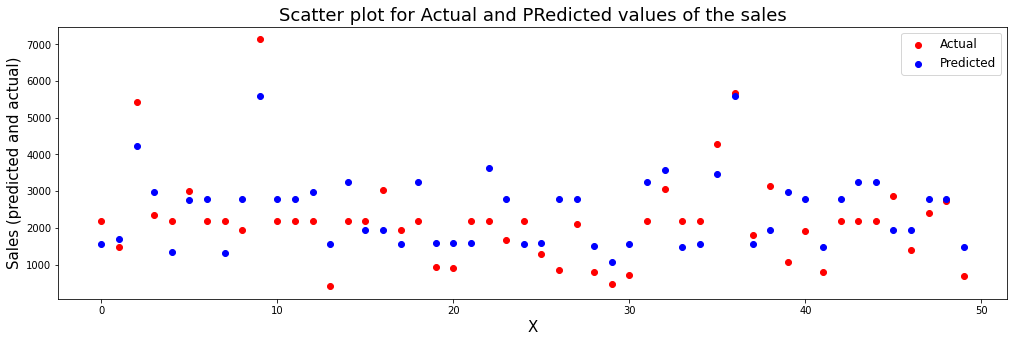

In [ ]:
# plotting actual and pred values of first 50 datapoints 
x_1 = list(np.arange(0,len(y_test1.iloc[:50])))
plt.figure(figsize=(17,5))
plt.scatter(x_1,y_test1.iloc[:50],color='red')
plt.scatter(x_1,pd.Series(y_pred).iloc[:50],color='blue')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Sales (predicted and actual)' , fontsize = 15)
plt.legend(['Actual','Predicted'],loc="upper right",fontsize = 12)
plt.title('Scatter plot for Actual and PRedicted values of the sales', fontsize = 18);